# Step 1
Download the Dataset
Download the dataset from the following link:
https://www.kaggle.com/neuromusic/avocado-prices/

# Step 2
Read the Dataset
Read the dataset into a Pandas Dataframe.
Does the dataset include any missing values? If so, drop them.
Hint: Pandas can do that with one line of code!

In [51]:
import pandas as pd 
df = pd.read_csv("avocado.csv").dropna()

# Step 3
Extract Features
Exclude the region and date from the considered features.

In [52]:
df.drop(['Unnamed: 0', 'Date', 'region'], axis=1, inplace=True)

# Step 4
Perform Preprocessing
Perform any needed pre-processing on the chosen features including:
Scaling;
Encoding; and
Dealing with Nan values.
Hint:
Use only the preprocessing steps for this mini project.

In [53]:
#encode the "Type" column
from sklearn.preprocessing import LabelEncoder
df["type"] = LabelEncoder().fit_transform(df["type"])

In [54]:
#assign input and output values (features/target)
features = len(df.columns)
X = df.iloc[:, 1:].values
y = df.iloc[:, 0:1].values

# Step 5
Split the Data
Split your data as follows:
80% training set
10% validation set
10% test set

In [55]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size = 0.2)
X_validate, X_test, y_validate, y_test = train_test_split(X_test, y_test, test_size = 0.5)

# Step 6
Train KNN Regression
Use a KNN regressor model to train your data.
Choose the best k for the KNN algorithm by trying different values and validating performance on the validation set.
Regression Metrics
Print the R-squared score of your final KNN regressor.

In [56]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=8).fit(X_train, y_train)
model.score(X_test, y_test)

scores = []
results = 0
best_score = 0
neighbours = range(1,30)

for i in neighbours:
    
    knn = KNeighborsRegressor(n_neighbors=i).fit(X_train, y_train)

    result = knn.score(X_test, y_test)
    scores.append(round(result,2))

    if result > best_score:
        best_score = result
        best_k = i
        bestmodel = knn

print(scores)
print("Best k:", best_k)

[0.67, 0.75, 0.77, 0.78, 0.77, 0.77, 0.77, 0.76, 0.76, 0.76, 0.76, 0.75, 0.75, 0.75, 0.74, 0.74, 0.74, 0.73, 0.73, 0.73, 0.73, 0.73, 0.72, 0.72, 0.72, 0.72, 0.72, 0.71, 0.71]
Best k: 4


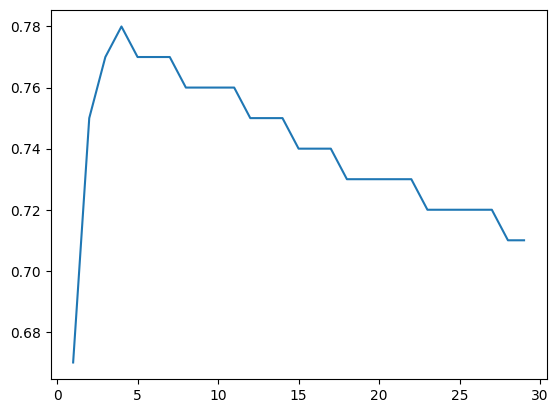

In [57]:
import matplotlib.pyplot as plt
plt.plot(neighbours, scores)

In [58]:
accuracy = bestmodel.score(X_validate, y_validate)
print("The best model has an accuracy of: ", round(accuracy,2))

The best model has an accuracy of:  0.75


# Step 7
Challenge Yourself (Optional)
Repeat step 6 for a different regression modelling technique.

In [59]:
#linear regression
from sklearn.linear_model import LinearRegression
modelLR = LinearRegression().fit(X_train, y_train)
score = modelLR.score(X_test, y_test)
print(score)

0.39720483706499043


In [60]:
#decision tree regressor
from sklearn.ensemble import RandomForestRegressor
modelRF = RandomForestRegressor(criterion="friedman_mse", max_leaf_nodes=100).fit(X_train, y_train.ravel())
score = modelRF.score(X_test, y_test)
y_pred = modelRF.predict(X_test)
print(score)

0.6966941841103498


In [61]:
from sklearn.metrics import mean_squared_error
print("Accuracy: ", score)
print("MSE: " +str(mean_squared_error(y_test, y_pred)))

Accuracy:  0.6966941841103498
MSE: 0.04924267214234482
